In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

TESTING


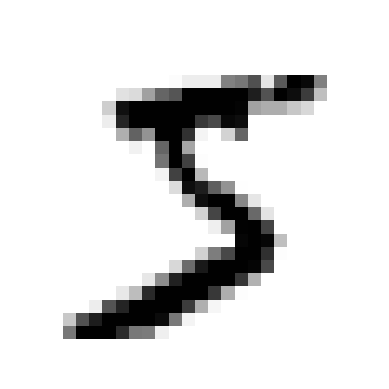

In [4]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [5]:
y[0]

'5'

TRAIN TEST SPLIT

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

MODEL


In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([X[1]])

array(['0'], dtype='<U1')

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf_5 = SGDClassifier(random_state=42)
sgd_clf_5.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf_5.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Accuracy tests are not a good measure for classification problems. For example: if we say NO for 90% of the time then it would be 90% accurate for a number between 1 and 10 but that is not accurate.

That is why we have CONFUSION MATRIX, it is the right metric to check for classification problems.


In [16]:
from sklearn.model_selection import cross_val_predict

In [17]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Confusion Matrix => <br>
[ [True Negative |  False Positive ]<br>
 [False Negative | True Positive ]]
       



---



Precision = $ \frac{TP}{TP + FP} $ <br> <br>
Recall = $ \frac{TP}{TP + FN} $



<strong> Precision: </strong>When the model says “positive”, how often is it right? <br>
<strong>Recall: </strong>Of all the actual positive cases, how many did the model manage to find?

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

For convenience we mixed both precision and recall together and made f1 score <br>
F1 Score = $ \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}} $



In [21]:
from sklearn.metrics import f1_score

In [22]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

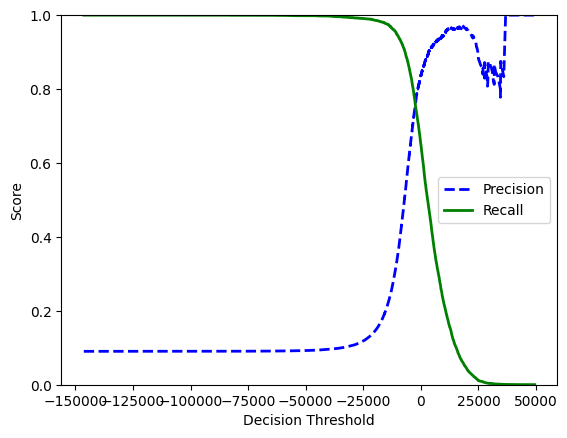

In [25]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend(loc="center right")
plt.ylim([0, 1])
plt.show()

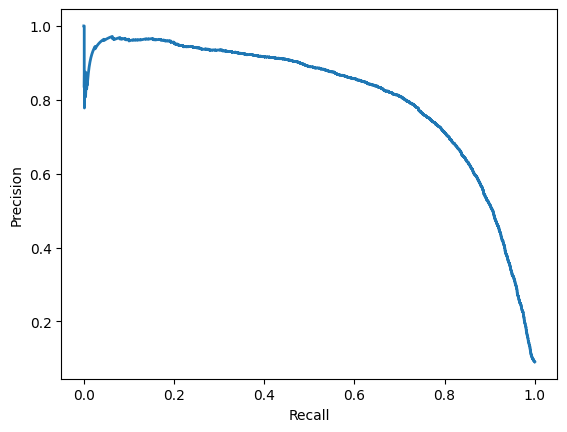

In [26]:
plt.plot(recalls, precisions, linewidth=2, label="Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

ROC Curve - Receiver operating characteristic

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [29]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

the model predicted the first image with 89% accuracy and the second one with -99%, but their aggregate would always be 100%

In [30]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

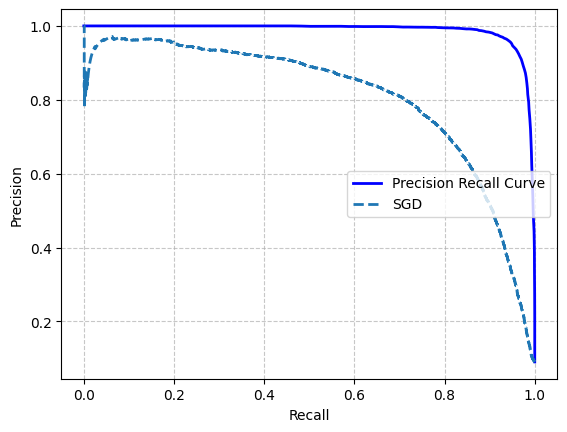

In [31]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Precision Recall Curve")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="center right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Support Vector Machine falls under OvO Method (One vs One Classifier)
If there are n classes then each class is differentiated by each class making a total of n * (n - 1) / 2 classification

In [32]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [33]:
some_digit = X[0]
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [34]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

#One vs Rest Classifier
every one classifier is differentiated with the rest so only n number of classifications

In [35]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [36]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [37]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:20000], y_train[:20000])
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [38]:
sgd_clf.decision_function([some_digit]).round()

array([[-126825., -136948.,  -26448.,  -25136., -166697.,    2862.,
        -112272., -166963.,  -69660.,  -47012.]])

In [39]:
cross_val_score(sgd_clf, X_train[:20000], y_train[:20000], cv=3, scoring="accuracy")

array([0.87580621, 0.84820759, 0.86333633])

Scaling gives better accuracy_score than non-scaled version

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:20000].astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train[:20000], cv=3, scoring="accuracy")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90850457, 0.89875506, 0.8919892 ])

#Error Analysis

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

this confusion matrix has a lot of numbers

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


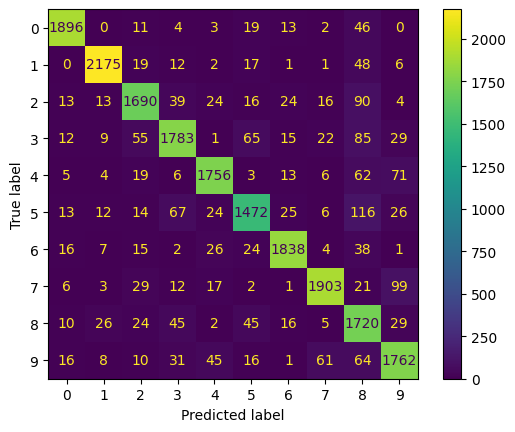

In [43]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train[:20000], cv=3)
ConfusionMatrixDisplay.from_predictions(y_train[:20000], y_train_pred)
plt.show()

a good alternative for seeing a lot of numbers would be getting the result in percentage which will be in correlation with how many classes were there in the dataset

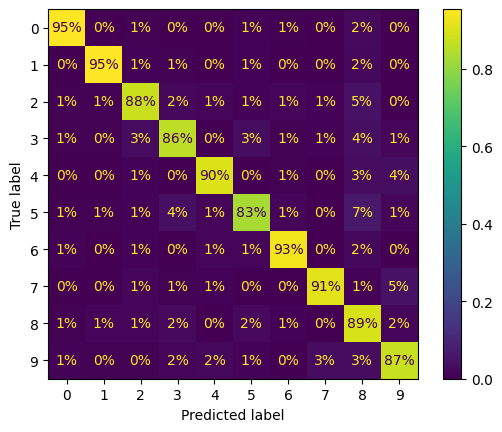

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train[:20000], y_train_pred, normalize="true", values_format=".0%")
plt.show()

#MultiLabel Classification
all the above models were predicting one output for the current image but what multilabel classification does it gives multiple outputs like if an image looks like 3 and 5 then it will say no to all other than 3 and 5
and will give the output yes to 3 and 5

In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [46]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilable = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier()

it checks wether a digit is larger than 7 and then it checks wether the digit is odd or not

In [47]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [48]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilable, cv=3)
f1_score(y_multilable, y_train_knn_pred, average="macro")

0.9764102655606048